# Vehicle prices analysis

In this project I will analyze vehicle sales ads.
The data is compiled from free website advertisements from "Crankshaft List", published over the last few years.
The goal is to find the parameters which effect the prices of vehicles.

## Loading & exploring data

### Importing libraries

In [3]:
# Importing the required libraries
import numpy as np # For mathematical tools, especially arrays
import pandas as pd # For general data analysis tools
import matplotlib.pyplot as plt # For 2D plotting

### Loading data

In [4]:
# Selecting the type of runtime and loading the data file
# Three types of runtimes are supported: 1 - A local runtime. 2 - A hosted runtime on the interactive Yandex platform. 3 - A hosted runtime on Google colaboratory. 
runtime_type = 3 # 1 - Local runtime. 2 - Yandex interactive platform. 3 - Google colaboratory.

# Setting filepaths
filepath_local = 'vehicles_us.csv'
filepath_hosted_yandex_platform = '/datasets/vehicles_us.csv'
filepath_hosted_google_colab = '/content/drive/My Drive/Colab Notebooks/Yandex Practicum/'

# Loading the data
if runtime_type == 1:
    print('A local runtime was chosen.\n')
    data = pd.read_csv(filepath_local)

elif runtime_type == 2:
    print('A hosted runtime on Yandex interactive platform was chosen.\n')
    data = pd.read_csv(filepath_hosted_yandex_platform)

elif runtime_type == 3:
    print('A hosted runtime on Google colaboratory was chosen.\n')
    from google.colab import drive # For integration of files with Google drive
    drive.mount('/content/drive') # Mounting Google drive
    print()
    data = pd.read_csv(filepath_hosted_google_colab + 'vehicles_us.csv')

else:
    print('Incorrect selection of a runtime type! Please set "runtime_type" to either "1", "2" or "3".')

A hosted runtime on Google colaboratory was chosen.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### Exploring data frame generally

In [5]:
# Looking at the general information
print('Calculating the number of rows in the data frame.')
num_rows = len(data) 
print('There are {} rows in the data frame.\n'.format(num_rows))

print('Printing the general information:\n')
data.info()
print('\n')

print('Printing some of the first rows:\n')
print(data.head(20), '\n')

print('Printing an example full row:\n')
print(data.loc[0,:], '\n') # Used to see all of the columns of one row

Calculating the number of rows in the data frame.
There are 51525 rows in the data frame.

Printing the general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Printing some of the first rows:

    price  model_year 

In [6]:
# Calculating the percentage of missing values per column
print('The percentages of missing values per column are:\n')
print(data.isnull().sum()*100 / len(data))

The percentages of missing values per column are:

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


### Exploring quantitative variables

Exploring the "price" column:

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64 



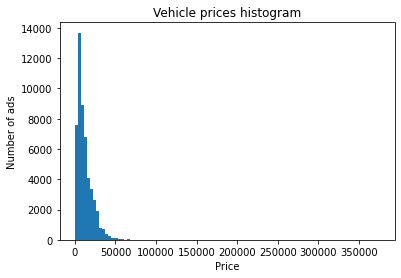

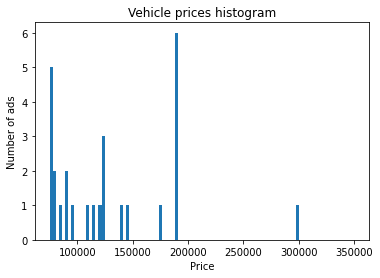

In [7]:
# The vehicle prices
print('Exploring the "price" column:\n')
print(data['price'].describe(), '\n')

data['price'].plot(kind='hist', bins=100, title='Vehicle prices histogram')
plt.ylabel('Number of ads')
plt.xlabel('Price')
plt.show()

data['price'].plot(kind='hist', bins=100, range=(75000,350000), title='Vehicle prices histogram')
plt.ylabel('Number of ads')
plt.xlabel('Price')
plt.show()

Exploring the "model_year" column:

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64 



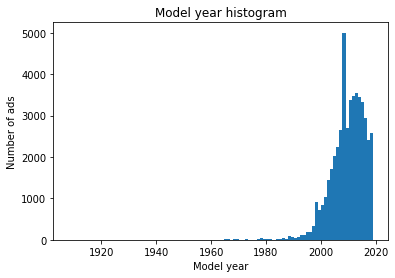

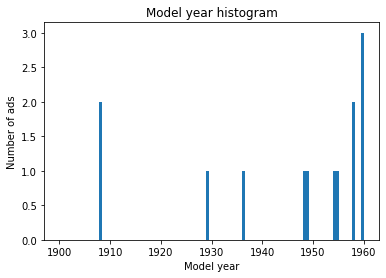

In [8]:
# Year of the car model
print('Exploring the "model_year" column:\n')
print(data['model_year'].describe(), '\n')

data['model_year'].plot(kind='hist', bins=100, title='Model year histogram')
plt.ylabel('Number of ads')
plt.xlabel('Model year')
plt.show()

data['model_year'].plot(kind='hist', bins=100, range=(1900,1960), title='Model year histogram')
plt.ylabel('Number of ads')
plt.xlabel('Model year')
plt.show()

Exploring the "odometer" column:

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64 



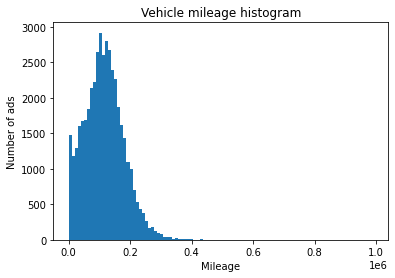

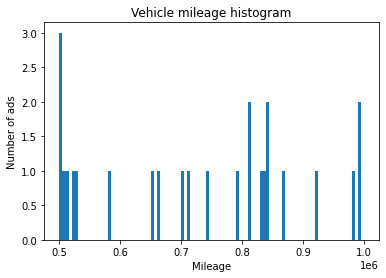

In [9]:
# The vehicles' mileage when the ad was published
print('Exploring the "odometer" column:\n')
print(data['odometer'].describe(), '\n')

data['odometer'].plot(kind='hist', bins=100, title='Vehicle mileage histogram')
plt.ylabel('Number of ads')
plt.xlabel('Mileage')
plt.show()

data['odometer'].plot(kind='hist', bins=100, range=(0.5*1e6, 1*1e6), title='Vehicle mileage histogram')
plt.ylabel('Number of ads')
plt.xlabel('Mileage')
plt.show()

Exploring the "days_listed" column:

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64 



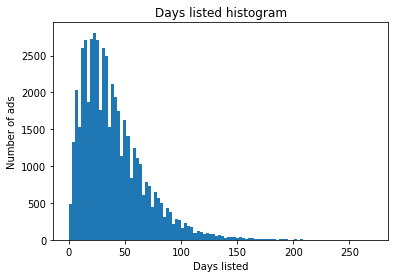

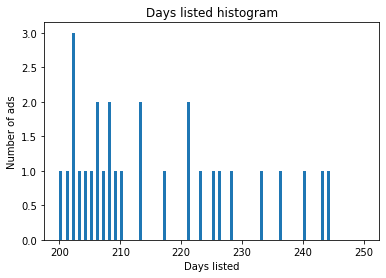

In [10]:
# Number of days that the ad was listed for
print('Exploring the "days_listed" column:\n')
print(data['days_listed'].describe(), '\n')

data['days_listed'].plot(kind='hist', bins=100, title='Days listed histogram')
plt.ylabel('Number of ads')
plt.xlabel('Days listed')
plt.show()

data['days_listed'].plot(kind='hist', bins=100, range=(200, 250), title='Days listed histogram')
plt.ylabel('Number of ads')
plt.xlabel('Days listed')
plt.show()

### Exploring qualitative variables

In [11]:
# Car models
print('The unique values in the "model" column are:')
print(data['model'].value_counts())

The unique values in the "model" column are:
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64


The unique values in the "condition" column are:
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64 



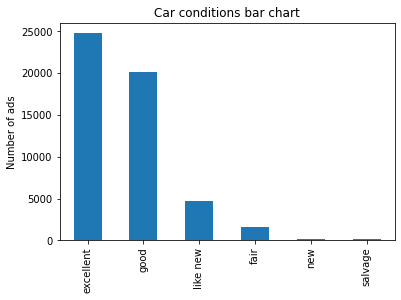

In [12]:
# Car conditions
print('The unique values in the "condition" column are:')
print(data['condition'].value_counts(), '\n')

data['condition'].value_counts().plot(kind='bar', title='Car conditions bar chart')
plt.ylabel('Number of ads')
plt.show()

The unique values in the "cylinders" column are:
8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64 



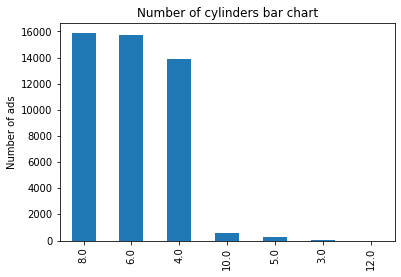

In [13]:
# Number of cylinders
print('The unique values in the "cylinders" column are:')
print(data['cylinders'].value_counts(), '\n')

data['cylinders'].value_counts().plot(kind='bar', title='Number of cylinders bar chart')
plt.ylabel('Number of ads')
plt.show()

The unique values in the "fuel" column are:
gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64 



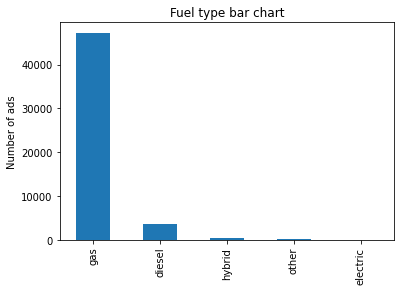

In [14]:
# Fuel type
print('The unique values in the "fuel" column are:')
print(data['fuel'].value_counts(), '\n')

data['fuel'].value_counts().plot(kind='bar', title='Fuel type bar chart')
plt.ylabel('Number of ads')
plt.show()

The unique values in the "transmission" column are:
automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64 



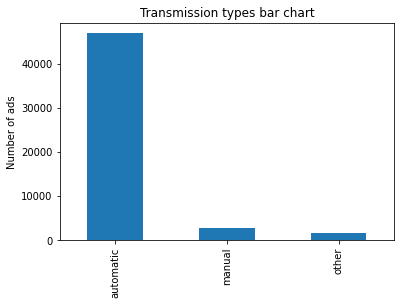

In [15]:
# Transmission type
print('The unique values in the "transmission" column are:')
print(data['transmission'].value_counts(), '\n')

data['transmission'].value_counts().plot(kind='bar', title='Transmission types bar chart')
plt.ylabel('Number of ads')
plt.show()

The unique values in the "type" column are:
SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64 



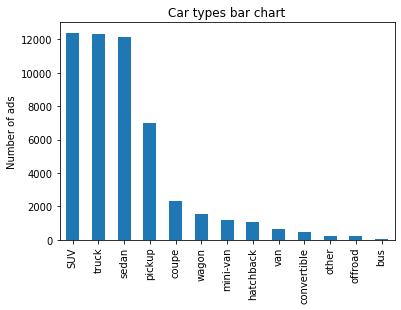

In [16]:
# Car type
print('The unique values in the "type" column are:')
print(data['type'].value_counts(), '\n')

data['type'].value_counts().plot(kind='bar', title='Car types bar chart')
plt.ylabel('Number of ads')
plt.show()

The unique values in the "paint_color" column are:
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64 



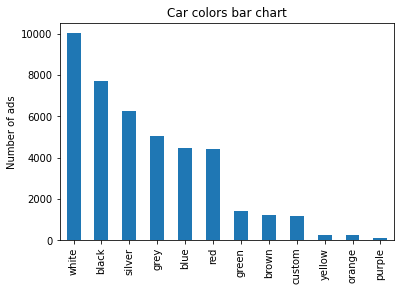

In [17]:
# Color of the paint
print('The unique values in the "paint_color" column are:')
print(data['paint_color'].value_counts(), '\n')

data['paint_color'].value_counts().plot(kind='bar', title='Car colors bar chart')
plt.ylabel('Number of ads')
plt.show()

The unique values in the "is_4wd" column are:
1.0    25572
Name: is_4wd, dtype: int64 



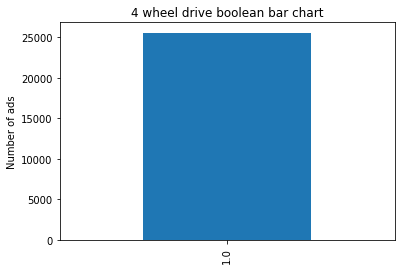

In [18]:
# Whether the vehicle has 4-wheel drive (1 = yes, 0 = no)
print('The unique values in the "is_4wd" column are:')
print(data['is_4wd'].value_counts(), '\n')

data['is_4wd'].value_counts().plot(kind='bar', title='4 wheel drive boolean bar chart')
plt.ylabel('Number of ads')
plt.show()

### Conclusion

We can identify some problems with the data, which we'll address in the following sections.

For the quantitative variables:
- price - No obvious issues.
- model_year - Has missing values (1-47906/51525 = 7%) and should contain integers.
- odometer - Has missing values (1-43633/51525 = 15%) and should contain integers.
- date_posted - Should contain datetime data.
- days_listed - No obvious issues.

For the qualitative variables:
- model - No obvious issues.
- condition - No obvious issues.
- cylinders - Has missing values (1-46265/51525 = 10%) and should contain integers.
- fuel - No obvious issues.
- transmission - No obvious issues.
- type - No obvious issues.
- paint_color - Has missing values (1-42258/51525 = 18%).
- is_4wd - Has missing values (1-25572/51525 = 50%), only contains "1"s and should contain booleans.

## Preprocessing data

In [19]:
# Copying the originial data into "data_pre", which will contain the preprocessed data
data_pre = data.copy()

### Treating missing values

In [20]:
# Calculating the percentage of missing values per column
print('The percentages of missing values per column are:\n')
print(data.isnull().sum()*100 / len(data))

The percentages of missing values per column are:

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


In [21]:
# Treating the missing values in the "model_year" column, while considering its correlation with the "model" column
print('Treating the missing values in the "model_year" column, while considering its correlation with the "model" column.\n')

# Keeping the variables of interest
data_for_pivot = data_pre.loc[:,['model_year','model']]

# Calculating statistics
model_year_medians_by_model = data_for_pivot.pivot_table(index='model', values='model_year', aggfunc='median') # Returns a data frame
print('The median model years for the different models are:\n')
print(model_year_medians_by_model, '\n')

# Filling the missing values
print('Filling the missing values.')
for row_num in range(0,len(data_pre)):
    model = data_pre.loc[row_num,'model']
    median_for_filling = model_year_medians_by_model.loc[model,'model_year']
    if pd.isna(data_pre.loc[row_num,'model_year']):
        data_pre.loc[row_num,'model_year'] = median_for_filling

Treating the missing values in the "model_year" column, while considering its correlation with the "model" column.

The median model years for the different models are:

                   model_year
model                        
acura tl               2007.0
bmw x5                 2010.0
buick enclave          2012.0
cadillac escalade      2009.0
chevrolet camaro       2013.0
...                       ...
toyota sienna          2008.0
toyota tacoma          2010.0
toyota tundra          2009.0
volkswagen jetta       2012.0
volkswagen passat      2013.0

[100 rows x 1 columns] 

Filling the missing values.


In [22]:
# Treating the missing values in the "cylinders" column, while considering its correlation with the "model" column
print('Treating the missing values in the "cylinders" column, while considering its correlation with the "model" column.\n')

# Keeping the variables of interest
data_for_pivot = data_pre.loc[:,['cylinders','model']]

# Calculating statistics
cylinders_medians_by_model = data_for_pivot.pivot_table(index='model', values='cylinders', aggfunc='median') # Returns a data frame
print('The median cylinder amounts for the different models are:\n')
print(cylinders_medians_by_model, '\n')

# Filling the missing values
print('Filling the missing values.')
for row_num in range(0,len(data_pre)):
    model = data_pre.loc[row_num,'model']
    median_for_filling = cylinders_medians_by_model.loc[model,'cylinders']
    if pd.isna(data_pre.loc[row_num,'cylinders']):
        data_pre.loc[row_num,'cylinders'] = median_for_filling

Treating the missing values in the "cylinders" column, while considering its correlation with the "model" column.

The median cylinder amounts for the different models are:

                   cylinders
model                       
acura tl                 6.0
bmw x5                   6.0
buick enclave            6.0
cadillac escalade        8.0
chevrolet camaro         6.0
...                      ...
toyota sienna            6.0
toyota tacoma            6.0
toyota tundra            8.0
volkswagen jetta         4.0
volkswagen passat        4.0

[100 rows x 1 columns] 

Filling the missing values.


In [23]:
# Treating the missing values in the "odometer" column, while considering its correlation with the "condition" column
print('Treating the missing values in the "odometer" column, while considering its correlation with the "condition" column.\n')

# Keeping the variables of interest
data_for_pivot = data_pre.loc[:,['odometer','condition']]

# Calculating statistics
odometer_medians_by_condition = data_for_pivot.pivot_table(index='condition', values='odometer', aggfunc='median') # Returns a data frame
print('The median mileages for the different conditions are:\n')
print(odometer_medians_by_condition, '\n')

# Filling the missing values
print('Filling the missing values.')
for row_num in range(0,len(data_pre)):
    condition = data_pre.loc[row_num,'condition']
    median_for_filling = odometer_medians_by_condition.loc[condition,'odometer']
    if pd.isna(data_pre.loc[row_num,'odometer']):
        data_pre.loc[row_num,'odometer'] = median_for_filling

Treating the missing values in the "odometer" column, while considering its correlation with the "condition" column.

The median mileages for the different conditions are:

           odometer
condition          
excellent  104230.0
fair       181613.0
good       129000.0
like new    72982.5
new          8002.0
salvage    142673.5 

Filling the missing values.


In [24]:
# Replacing the missing values in the "paint_color" column with "unknown"s
data_pre['paint_color'] = data_pre['paint_color'].fillna('unknown')

# Verifying the replacement
print('Verifying the replacement:')
print(data_pre['paint_color'].value_counts())

Verifying the replacement:
white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64


In [25]:
# Replacing the missing values in the "is_4wd" column with "0"s
data_pre['is_4wd'] = data_pre['is_4wd'].where(data_pre['is_4wd'] == 1, 0)

# Verifying the replacement
print('Verifying the replacement:')
print(data_pre['is_4wd'].value_counts())

Verifying the replacement:
0.0    25953
1.0    25572
Name: is_4wd, dtype: int64


In [26]:
# Counting the missing values
print('Number of initial rows: {}'.format(len(data)))
print('Number of rows with missing values: {}'.format(len(data.dropna().reset_index(drop = True))))
print('Number of rows after treating missing values: {}'.format(len(data_pre)))

Number of initial rows: 51525
Number of rows with missing values: 14852
Number of rows after treating missing values: 51525


In [27]:
# Verifying the changes
print('Verifying the changes by checking the general information, to see that no missing values remain:\n')
data_pre.info()

Verifying the changes by checking the general information, to see that no missing values remain:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Treating data types

In [28]:
# Converting the real variables to integers
data_pre['model_year'] = data_pre['model_year'].astype('int64')
data_pre['odometer'] = data_pre['odometer'].astype('int64')
data_pre['cylinders'] = data_pre['cylinders'].astype('int64')

In [29]:
# Converting strings to boolean
data_pre['is_4wd'] = data_pre['is_4wd'].astype('bool')

In [30]:
# Converting strings to datetime
# It seems that the "date_posted" column has to be formatted differently when running the code on different platforms
if runtime_type == 1: # Local runtime
    date_posted_format = '%Y-%m-%d'
elif runtime_type == 2: # Yandex interactive platform
    date_posted_format = '%Y-%m-%d'
else: # Google colaboratory
    date_posted_format = '%d/%m/%Y'
data_pre['date_posted']= pd.to_datetime(data_pre['date_posted'], format=date_posted_format)

In [31]:
# Verifying the data type changes
print('Verifying the data type changes by checking the general information:')
data_pre.info()

Verifying the data type changes by checking the general information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.

### Conclusion

The following columns had missing values:

- model_year - Had less than 10% of values missing (1-47906/51525 = 7%). These were replaced by the median value, due to their relatively small amount and since the distribution of the column isn't symmetric and has some outliers, so it's a better choice than the mean. When calculating the replacement medians, I've also used the correlation between the model years and the vehicle models.
- cylinders - Had about 10% of values missing (1-46265/51525 = 10%). These were replaced by the median amount of cylinders that was found by using the correlation between this variable and the models of the vehicles.
- odometer - Had more than 10% of values missing (1-43633/51525 = 15%). These were replaced by the median value, due to their relatively small amount and since the distribution of the column isn't symmetric and has some outliers, so it's a better choice than the mean. When calculating the replacement medians, I've also used the correlation between the mileage and the vehicle conditions.
- paint_color - Had almost 20% missing values (1-42258/51525 = 18%). These were replaced by "unknown" instead of removing them, due to their large number, in order to not lose too much data.
- is_4wd - About half of the values were missing (1-25572/51525 = 50%). These were replaced by "0"s, since the rest of the values were "1"s, which implies that this is a boolean variable where only the "True"s were filled.

The factors that may have resulted in missing values are:
- model_year - Perhaps people don't remember the value of the parameter, or don't consider it as one of the most important parameters to fill and just skip it. Perhaps people think it's enough to only input another parameter from which this value can be found, such as the vehicle model. 
- cylinders - Perhaps people don't remember the value of the parameter, or don't consider it as one of the most important parameters to fill and just skip it. Perhaps people think it's enough to only input another parameter from which this value can be found, such as the vehicle model. Perhaps the number was filled by selecting from a list, and more rare amounts didn't appear.
- odometer - Perhaps people don't remember the value of the parameter, or don't consider it as one of the most important parameters to fill and just skip it. Perhaps people think it's enough to only input another parameter from which this value can be estimated, such as the vehicle's condition.  
- paint_color - Perhaps some of the ads were filled in an form that didn't ask for color, or people don't fill it since they consider it a much less crucial parameter in car buying.
- is_4wd - Perhaps only the "True" values were filled to save time, since it's clear what it means if this value is missing in this website, or maybe when filling the details of the ad one has to tick a box, which wasn't converted correctly due to a bug. 

The following columns had their data type changed:
- model_year - Changed to integers, since years are integers.
- odometer - Changed to integers, since that's enough for the analysis purposes and since the values already appeared without fractions.
- date_posted - Changed to datetime data type since it contains dates.
- is_4wd - Changed to booleans, since it describes whether it's true or false that the vehicle has a 4-wheel drive option.
- cylinders - Changed to integers since the anumber of cylinders is a whole number. I note that this is still a categorical variable.


## Expanding data

### Adding temporal data

In [32]:
# Adding columns with the day of the week, month, and year the ad was placed
data_pre['day_posted'] = data_pre['date_posted'].dt.weekday
data_pre['month_posted'] = data_pre['date_posted'].dt.month
data_pre['year_posted'] = data_pre['date_posted'].dt.year

In [33]:
# Adding a column with the vehicle's age (in years) when the ad was placed
data_pre['age'] = ( data_pre['date_posted'].dt.year - data_pre['model_year'] ).astype(int)

# Increasing the age by one to prevent division by 0 in the future
data_pre['age'] += 1

print('Exploring the new column:\n')
data_pre['age'].describe()

Exploring the new column:



count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age, dtype: float64

In [34]:
# Adding a column with the vehicle's average mileage per year
data_pre['mileage_avg'] = data_pre['odometer'] / data_pre['age']

print('Exploring the new column:\n')
data_pre['mileage_avg'].describe()

Exploring the new column:



count     51525.000000
mean      15378.480570
std       11808.751864
min           0.000000
25%        9363.636364
50%       13036.181818
75%       18222.222222
max      373200.000000
Name: mileage_avg, dtype: float64

### Changing condition scale

In [35]:
# Replacing string values with a numeric scale in the 'condition' column

# Defining a function for performing the replacement 
def condition_str_to_num(condition_string):
    '''
    Returns the following numerical values for the given strings:
    - 'new' -> 5
    - 'like new' -> 4
    - 'excellent' -> 3
    - 'good' -> 2
    - 'fair' -> 1
    - 'salvage' -> 0
    - other -> NaN
    '''
    if condition_string == 'salvage':
        condition_number = 0
    elif condition_string == 'fair':
        condition_number = 1
    elif condition_string == 'good':
        condition_number = 2
    elif condition_string == 'excellent':
        condition_number = 3
    elif condition_string == 'like new':
        condition_number = 4
    elif condition_string == 'new':
        condition_number = 5
    else:
        condition_number = float('nan')
        if 0: # An option for print purposes that don't fit any category
            print('The following condition doesn\'t fit any category:', condition_string)
    return condition_number

# Using the condition replacement function
data_pre['condition'] = data_pre['condition'].apply(condition_str_to_num)

# Verifying the changes
print('Verifying the changes by printing the unique values in the "condition" column:\n')
print(data_pre['condition'].value_counts())

Verifying the changes by printing the unique values in the "condition" column:

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


In [36]:
# Verifying the changes
print('Presenting the general info to verify the changes:\n')
print(data_pre.info(), '\n')

print('Presenting an example row:\n')
print(data_pre.loc[0,:])

Presenting the general info to verify the changes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_posted    51525 non-null  int64         
 14  month_posted  51525 non-null  int6

## Exploratory data analysis

### Analyzing outliers

Exploring the "price" column:

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64 

The median is: 9000.0 

The bottom outlier is -12758.5 and the top is 34597.5.

Exploring the "price" column without the outliers:

count    49879.000000
mean     11095.558472
std       7806.520888
min          1.000000
25%       4995.000000
50%       8990.000000
75%      15900.000000
max      34595.000000
Name: price, dtype: float64 

The median is: 8990.0 



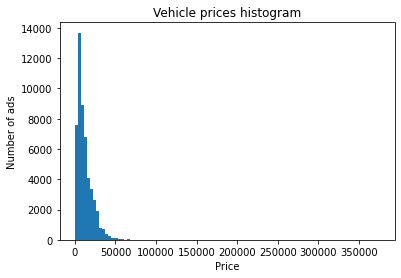

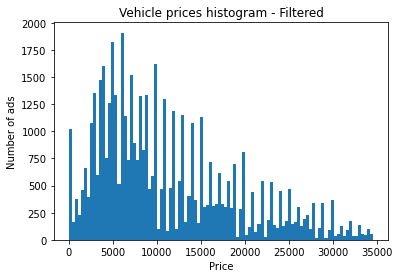

In [37]:
# Studying the vehicle prices
print('Exploring the "price" column:\n')
print(data_pre['price'].describe(), '\n')
print('The median is:', data_pre['price'].median(), '\n')

# Calculating the limit of the outliers
Q1 = data_pre['price'].quantile(0.25)
Q3 = data_pre['price'].quantile(0.75)
IQR = Q3 - Q1
price_outliers_bot = Q1 - 1.5*IQR
price_outliers_top = Q3 + 1.5*IQR
print('The bottom outlier is {} and the top is {}.\n'.format(price_outliers_bot, price_outliers_top))

# Studying the vehicle prices without the outliers
print('Exploring the "price" column without the outliers:\n')
print(data_pre.query('@price_outliers_bot < price and price < @price_outliers_top')['price'].describe(), '\n')
print('The median is:', data_pre.query('@price_outliers_bot < price and price < @price_outliers_top')['price'].median(), '\n')

# Plotting the original and the filtered data (without outliers)
data_pre['price'].plot(kind='hist', bins=100, title='Vehicle prices histogram')
plt.ylabel('Number of ads')
plt.xlabel('Price')
plt.show()

data_pre.query('@price_outliers_bot < price and price < @price_outliers_top')['price'].plot(kind='hist', bins=100, title='Vehicle prices histogram - Filtered')
plt.ylabel('Number of ads')
plt.xlabel('Price')
plt.show()

Exploring the "age" column:

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age, dtype: float64 

The median is: 9.0 

The bottom outlier is -7.0 and the top is 25.0.

Exploring the "age" column without the outliers:

count    50638.000000
mean         9.095225
std          5.098115
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         24.000000
Name: age, dtype: float64 

The median is: 8.0 



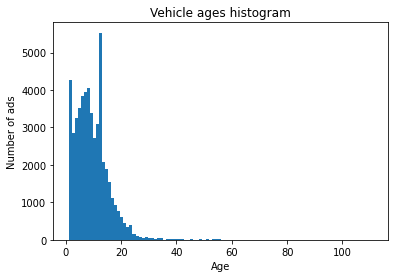

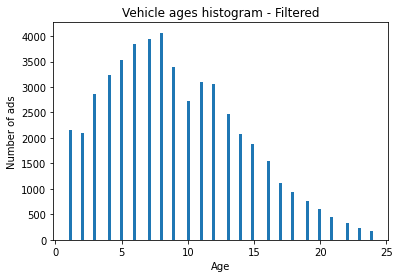

In [38]:
# Studying the vehicle ages
print('Exploring the "age" column:\n')
print(data_pre['age'].describe(), '\n')
print('The median is:', data_pre['age'].median(), '\n')

# Calculating the limit of the outliers
Q1 = data_pre['age'].quantile(0.25)
Q3 = data_pre['age'].quantile(0.75)
IQR = Q3 - Q1
age_outliers_bot = Q1 - 1.5*IQR
age_outliers_top = Q3 + 1.5*IQR
print('The bottom outlier is {} and the top is {}.\n'.format(age_outliers_bot, age_outliers_top))

# Studying the vehicle ages without the outliers
print('Exploring the "age" column without the outliers:\n')
print(data_pre.query('@age_outliers_bot < age and age < @age_outliers_top')['age'].describe(), '\n')
print('The median is:', data_pre.query('@age_outliers_bot < age and age < @age_outliers_top')['age'].median(), '\n')

# Plotting the original and the filtered data (without outliers)
data_pre['age'].plot(kind='hist', bins=100, title='Vehicle ages histogram')
plt.ylabel('Number of ads')
plt.xlabel('Age')
plt.show()

data_pre.query('@age_outliers_bot < age and age < @age_outliers_top')['age'].plot(kind='hist', bins=100, title='Vehicle ages histogram - Filtered')
plt.ylabel('Number of ads')
plt.xlabel('Age')
plt.show()

Exploring the "odometer" column:

count     51525.000000
mean     115199.007278
std       60484.868232
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64 

The median is: 110908.0 

The bottom outlier is -32561.5 and the top is 256050.5.

Exploring the "odometer" column without the outliers:

count     50602.000000
mean     111701.171120
std       53977.810802
min           0.000000
25%       74502.000000
50%      109012.500000
75%      144554.000000
max      256000.000000
Name: odometer, dtype: float64 

The median is: 109012.5 



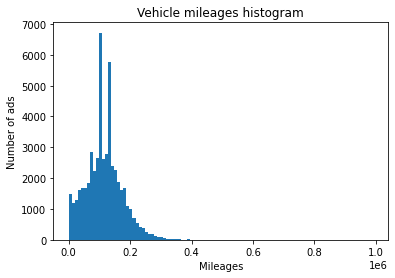

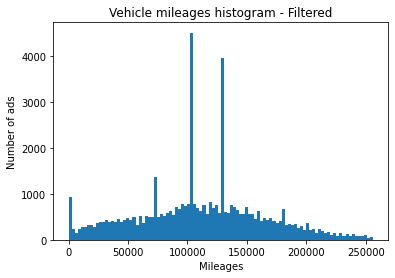

In [39]:
# Studying the vehicles' mileage when the ad was published
print('Exploring the "odometer" column:\n')
print(data_pre['odometer'].describe(), '\n')
print('The median is:', data_pre['odometer'].median(), '\n')

# Calculating the limit of the outliers
Q1 = data_pre['odometer'].quantile(0.25)
Q3 = data_pre['odometer'].quantile(0.75)
IQR = Q3 - Q1
odometer_outliers_bot = Q1 - 1.5*IQR
odometer_outliers_top = Q3 + 1.5*IQR
print('The bottom outlier is {} and the top is {}.\n'.format(odometer_outliers_bot, odometer_outliers_top))

# Studying the mileages without the outliers
print('Exploring the "odometer" column without the outliers:\n')
print(data_pre.query('@odometer_outliers_bot < odometer and odometer < @odometer_outliers_top')['odometer'].describe(), '\n')
print('The median is:', data_pre.query('@odometer_outliers_bot < odometer and odometer < @odometer_outliers_top')['odometer'].median(), '\n')

# Plotting the original and the filtered data (without outliers)
data_pre['odometer'].plot(kind='hist', bins=100, title='Vehicle mileages histogram')
plt.ylabel('Number of ads')
plt.xlabel('Mileages')
plt.show()

data_pre.query('@odometer_outliers_bot < odometer and odometer < @odometer_outliers_top')['odometer'].plot(kind='hist', bins=100, title='Vehicle mileages histogram - Filtered')
plt.ylabel('Number of ads')
plt.xlabel('Mileages')
plt.show()

The unique values in the "cylinders" column are:
8     17712
6     17435
4     15499
10      549
5       294
3        34
12        2
Name: cylinders, dtype: int64 

An outlier is defined as a value with less ads than 10% of the mean number of ads, which is 736.0714285714286 ads.



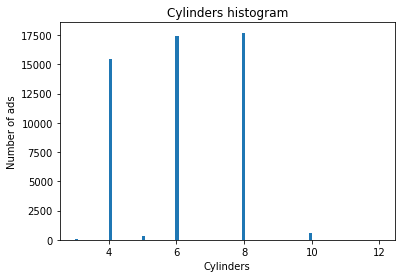

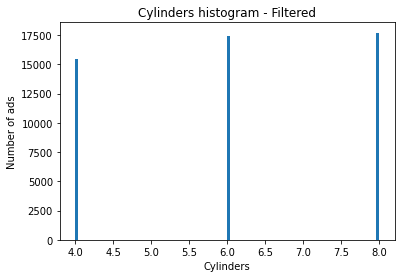

In [40]:
# Studying the number of cylinders
print('The unique values in the "cylinders" column are:')
cylinders_ads_num = data_pre['cylinders'].value_counts() # Returns a "pd.Series"
print(cylinders_ads_num, '\n')

# Finding the outliers
# An outlier is defined as a value with less ads than some percent of the mean number of ads
outlier_percent = 10 # The percentage of ads which defines an outlier
outlier_num = cylinders_ads_num.mean() * outlier_percent / 100  # The number of ads which defines an outlier
print('An outlier is defined as a value with less ads than {}% of the mean number of ads, which is {} ads.\n'.format(outlier_percent, outlier_num))
cylinders_outliers = cylinders_ads_num[cylinders_ads_num < outlier_num].index.values # Returns a "pd.Series" and ".index.values" returns a "numpy.ndarray"

# Plotting the original and the filtered data (without outliers)
data_pre['cylinders'].plot(kind='hist', bins=100, title='Cylinders histogram')
plt.ylabel('Number of ads')
plt.xlabel('Cylinders')
plt.show()

data_pre.query('cylinders not in @cylinders_outliers')['cylinders'].plot(kind='hist', bins=100, title='Cylinders histogram - Filtered')
plt.ylabel('Number of ads')
plt.xlabel('Cylinders')
plt.show()

The unique values in the "condition" column are:
3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64 

An outlier is defined as a value with less ads than 10% of the mean number of ads, which is 858.75 ads.



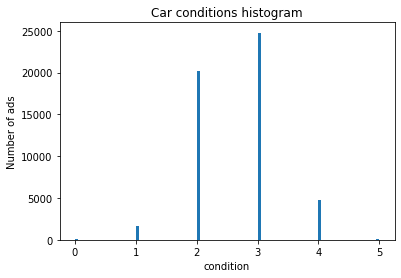

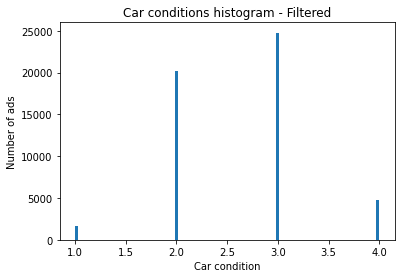

In [41]:
# Studying the car condition
print('The unique values in the "condition" column are:')
condition_ads_num = data_pre['condition'].value_counts() # Returns a "pd.Series"
print(condition_ads_num, '\n')

# Finding the outliers
# An outlier is defined as a value with less ads than some percent of the mean number of ads
outlier_percent = 10 # The percentage of ads which defines an outlier
outlier_num = condition_ads_num.mean() * outlier_percent / 100  # The number of ads which defines an outlier
print('An outlier is defined as a value with less ads than {}% of the mean number of ads, which is {} ads.\n'.format(outlier_percent, outlier_num))
condition_outliers = condition_ads_num[condition_ads_num < outlier_num].index.values # Returns a "pd.Series" and ".index.values" returns a "numpy.ndarray"

# Plotting the original and the filtered data (without outliers)
data_pre['condition'].plot(kind='hist', bins=100, title='Car conditions histogram')
plt.ylabel('Number of ads')
plt.xlabel('condition')
plt.show()

data_pre.query('condition not in @condition_outliers')['condition'].plot(kind='hist', bins=100, title='Car conditions histogram - Filtered')
plt.ylabel('Number of ads')
plt.xlabel('Car condition')
plt.show()

In [42]:
# Saving the outliers in a separate data frame
print('Saving the outliers in a separate data frame.\n')

data_outliers = data_pre.query(
    'price <= @price_outliers_bot or @price_outliers_top <= price'
    + ' or age <= @age_outliers_bot or @age_outliers_top <= age'
    + ' or odometer <= @odometer_outliers_bot or @odometer_outliers_top <= odometer'

    + ' or cylinders in @cylinders_outliers'
    + ' or condition in @condition_outliers'
)

print('The preprocessed data contained {} rows, and {} of them were outliers.'.format(len(data_pre),len(data_outliers)))

Saving the outliers in a separate data frame.

The preprocessed data contained 51525 rows, and 4435 of them were outliers.


In [43]:
# Filtering the outliers from the data
print('Filtering the outliers from the data.\n')

data_filtered = data_pre.query(
    '@price_outliers_bot < price and price < @price_outliers_top'
    + ' and @age_outliers_bot < age and age < @age_outliers_top'
    + ' and @odometer_outliers_bot < odometer and odometer < @odometer_outliers_top'

    + ' and cylinders not in @cylinders_outliers'
    + ' and condition not in @condition_outliers'
)

print('The preprocessed data contained {} rows, and {} rows remain after filtering the outliers.'.format(len(data_pre),len(data_filtered)))

Filtering the outliers from the data.

The preprocessed data contained 51525 rows, and 47090 rows remain after filtering the outliers.


### Conclusion

We see that the outliers change the shape of the distribution by:
- Creating a long tail in the distribtion, which makes it harder to read the histogram.
- Effecting the skewness of the distribution.
- Causing unexpected peaks appear, due to the modified division of the bins.

After removing the outliers, it became easier to look at the shape (in particular the peaks and the skewness) and at the values of the more common data.

Taking a closer look at each variable's histograms, we see that:
- price - One main peak is seen when looking at the distribution with or without the outliers. The non-outlier values are distributed between about 1 and 35k, and the extremely low values seem unexpected. A peculiar lower peak appears near zero, indicating that a lot of the prices are very low, where the first quartile is at about 5k. The average price of a vehicle is about 12k. The mean is greater than the median, which can be seen in the positive-skewness of the distribution. The range of the outliers is very vast, from about 35k to 375k, but this is plausible since collector cars can get very expensive. After removing the outliers, the mean and the median almost didn't change. The positive-skewness remained clearly visible.
- age - Before zooming into the area without the outliers, multiple unexpected peaks can be seen, but only one remains when looking closer with narrower bins. The non-outlier values are distributed between about 1 and 25 years, which isn't unusual. The average age of a vehicle is about 10 years. The mean is greater than the median, which can be seen in the positive-skewness of the distribution. There were outliers from 25 years to over 100, which is plausible since there aren't many old vehicles on the market, and collector vehicles can reach such ages. After removing the outliers, the median age decreased as expected, by one year. The positive-skewness remained clearly visible.
- odometer - One main peak exists if we disregard the very narrow peaks resulting from filling in missing values with medians. The average mileage is about 115k. The mean is greater than the median, which can be seen in the positive-skewness of the distribution. There were outliers from about 250k to almost 1000k, which seems reasonable, since very few cars reach such extreme mileages. After removing the outliers the mean age decreased by about 4k, but the effect on the median was smaller, which decreased by about 1k. The distribution became much more symmetric.
- cylinders - The non-outlier numbers of cylinders are 4, 6 and 8, which have  a similar amount of ads, and this looks reasonable. The outliers were 3, 5, 10 and 12 cylinders, which are indeed uncommon amounts.
- condition - The non-outlier car conditions are "fair", "good", "excellent" & "like new", where "good" and "excellent" have an order of magnitude more ads than the other conditions. This is reasonable, since most of the vehicles should indeed have these mid-range conditions. The outliers were vehicles in a salvage and brand new conditions, which are the expected extreme states. 

### Analyzing ad lifetimes

Exploring the "days_listed" column:

count    47090.000000
mean        39.540922
std         28.218135
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64 

The bottom outlier is -32.0 and the top is 104.0.



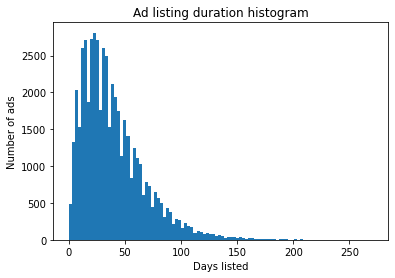

In [44]:
# Analyzing the number of days that the ad was listed for
print('Exploring the "days_listed" column:\n')
print(data_filtered['days_listed'].describe(), '\n')

# Calculating the limit of the outliers
Q1 = data_pre['days_listed'].quantile(0.25)
Q3 = data_pre['days_listed'].quantile(0.75)
IQR = Q3 - Q1
days_listed_outliers_bot = Q1 - 1.5*IQR
days_listed_outliers_top = Q3 + 1.5*IQR
print('The bottom outlier is {} and the top is {}.\n'.format(days_listed_outliers_bot, days_listed_outliers_top))

# Plotting the data
data_pre['days_listed'].plot(kind='hist', bins=100, title='Ad listing duration histogram')
plt.ylabel('Number of ads')
plt.xlabel('Days listed')
plt.show()

In [45]:
# Calculating the mean and the median of the days an ad was listed for
days_listed_mean = data_filtered['days_listed'].mean()
days_listed_median = data_filtered['days_listed'].median()
print('The mean lifetime of an ad is {:.2f} days and the median is {:.2f} days.'.format(days_listed_mean, days_listed_median))

The mean lifetime of an ad is 39.54 days and the median is 33.00 days.


In [46]:
# Analyzing the ads which were listed for a short time
days_listed_short_percent = 10 # The percent of the mean of days that defines a short ad lifetime
days_listed_short_num = days_listed_mean * days_listed_short_percent / 100 # The number of days that defines a short ad lifetime
print('A short ad lifetime is defined as less than {:.2f}% of the mean number of days listed, which is {:.2f} days.\n'.format(days_listed_short_percent, days_listed_short_num))

data_days_listed_short = data_filtered.query('days_listed < @days_listed_short_num')
print('There are {} ads with a short lifetime.\n'.format(len(data_days_listed_short)))

# Calculating the correlation between short-lived ads and other properties
print('Calculating the correlation between short-lived ads and other properties:\n')
data_for_corr_short = data_days_listed_short.loc[:,['days_listed','price','model_year','condition','odometer','is_4wd','day_posted','month_posted','year_posted','age','mileage_avg']]
pd.set_option('display.max_rows', 20) # Allows displaying the entire data frame
pd.set_option('display.max_columns', 20)
print(data_for_corr_short.corr(), '\n')

A short ad lifetime is defined as less than 10.00% of the mean number of days listed, which is 3.95 days.

There are 804 ads with a short lifetime.

Calculating the correlation between short-lived ads and other properties:

              days_listed     price  model_year  condition  odometer  \
days_listed      1.000000 -0.010207   -0.012514   0.015310  0.033440   
price           -0.010207  1.000000    0.545048   0.157875 -0.473051   
model_year      -0.012514  0.545048    1.000000   0.247684 -0.585621   
condition        0.015310  0.157875    0.247684   1.000000 -0.312931   
odometer         0.033440 -0.473051   -0.585621  -0.312931  1.000000   
is_4wd           0.035306  0.345785   -0.029541  -0.013262  0.063908   
day_posted       0.019832  0.061942    0.039478   0.006521 -0.061813   
month_posted     0.050256 -0.037948   -0.059889  -0.035813  0.052397   
year_posted     -0.046996  0.044418    0.046907   0.039627 -0.036827   
age              0.008308 -0.541175   -0.995991  -0.2441

In [47]:
# Analyzing the ads which were listed for a long time
days_listed_long_percent = 90 # The percent of the mean of days that defines a long ad lifetime
days_listed_long_num = days_listed_mean * days_listed_long_percent / 100 # The number of days that defines a long ad lifetime
print('A long ad lifetime is defined as more than {:.2f}% of the mean number of days listed, which is {:.2f} days.\n'.format(days_listed_long_percent, days_listed_long_num))

data_days_listed_long = data_filtered.query('@days_listed_long_num < days_listed')
print('There are {} ads with a long lifetime.\n'.format(len(data_days_listed_long)))

# Calculating the correlation between long-lived ads and other properties
print('Calculating the correlation between long-lived ads and other properties:\n')
data_for_corr_long = data_days_listed_long.loc[:,['days_listed','price','model_year','condition','odometer','is_4wd','day_posted','month_posted','year_posted','age','mileage_avg']]
pd.set_option('display.max_rows', 20) # Allows displaying the entire data frame
pd.set_option('display.max_columns', 20)
print(data_for_corr_long.corr(), '\n')

A long ad lifetime is defined as more than 90.00% of the mean number of days listed, which is 35.59 days.

There are 21791 ads with a long lifetime.

Calculating the correlation between long-lived ads and other properties:

              days_listed     price  model_year  condition  odometer  \
days_listed      1.000000 -0.005363   -0.001143   0.002986  0.003289   
price           -0.005363  1.000000    0.529339   0.178284 -0.419587   
model_year      -0.001143  0.529339    1.000000   0.257253 -0.523987   
condition        0.002986  0.178284    0.257253   1.000000 -0.296654   
odometer         0.003289 -0.419587   -0.523987  -0.296654  1.000000   
is_4wd          -0.004571  0.350211   -0.021282  -0.004813  0.069113   
day_posted      -0.002455  0.002054   -0.000605   0.007047  0.000129   
month_posted    -0.008728  0.000511   -0.018515  -0.001069  0.012752   
year_posted      0.012350 -0.001934    0.022755  -0.000947 -0.007811   
age              0.002295 -0.528330   -0.995626  -0.2567

### Conclusion

- The typical lifetime of an ad is a little over a month.
- The mean lifetime of an ad is 39.54 days and the median is 33.00 days.
- The data is within the bottom outlier, and the top outlier limit is about 100 days.
- For ads that were removed quickly and for ads that were listed for an abnormally long time, there doesn't seem to be any significant correlation with other quantitative variables.

### Analyzing vehicle types

The number of ads per vehicle type are:

SUV            11753
sedan          11664
truck          10658
pickup          6140
coupe           1941
wagon           1492
mini-van        1137
hatchback        989
van              561
convertible      333
other            232
offroad          182
bus                8
Name: type, dtype: int64 



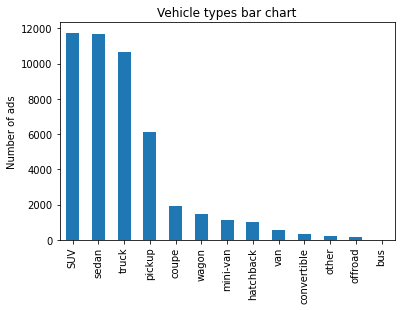


The 2 most popular vehicle types are: ['SUV' 'sedan']


In [48]:
# Finding the number of ads per vehicle type
ads_per_type = data_filtered['type'].value_counts() # Counting the number of ads per car type
type_popular_num = 2 # Number of most popular vehicle types to find
type_popular = ads_per_type.index.values[0:type_popular_num] # Saving the most popular vehicle types
# The type of a "pd.Series.index.values" is "numpy.ndarray", and it contains strings

print('The number of ads per vehicle type are:\n')
print(ads_per_type, '\n')

data_filtered['type'].value_counts().plot(kind='bar', title='Vehicle types bar chart')
plt.ylabel('Number of ads')
plt.show()

print('\nThe {} most popular vehicle types are: {}'.format(type_popular_num, type_popular))

# Saving the data of the most popular types into separate data frames
for i in range(0,type_popular_num):
    popular_vehicle_type = type_popular[i] # A string
    df_name = 'data_filtered_type_' + popular_vehicle_type.lower() # The name of the data frame, kept lowercase
    exec("%s = data_filtered.query('type == @popular_vehicle_type')"%(df_name))

In [49]:
# Calculating the average price per vehicle type
mean_price_per_type = data_filtered.pivot_table(index='type', values='price', aggfunc='mean').sort_values('price')
print('The average prices per vehicle type are:\n\n', mean_price_per_type)

The average prices per vehicle type are:

                     price
type                     
hatchback     6874.960566
sedan         7031.174983
mini-van      8061.890941
van           8767.055258
wagon         9026.818365
SUV          10532.251085
other        10566.047414
bus          11306.875000
convertible  13214.693694
coupe        13937.594024
offroad      14344.049451
pickup       15229.281596
truck        15377.735691


### Conclusion

- The two vehicle types with the greatest number of ads are SUVs and sedans, which is expected due to how commonly used they are.
- The two vehicle types with the highest mean price are trucks and pickups, which is expected due to their large sizes.

### Analyzing prices of popular vehicle types

#### SUVs

              price       age  odometer  condition
price      1.000000 -0.589294 -0.498864   0.261953
age       -0.589294  1.000000  0.550480  -0.301407
odometer  -0.498864  0.550480  1.000000  -0.348628
condition  0.261953 -0.301407 -0.348628   1.000000 



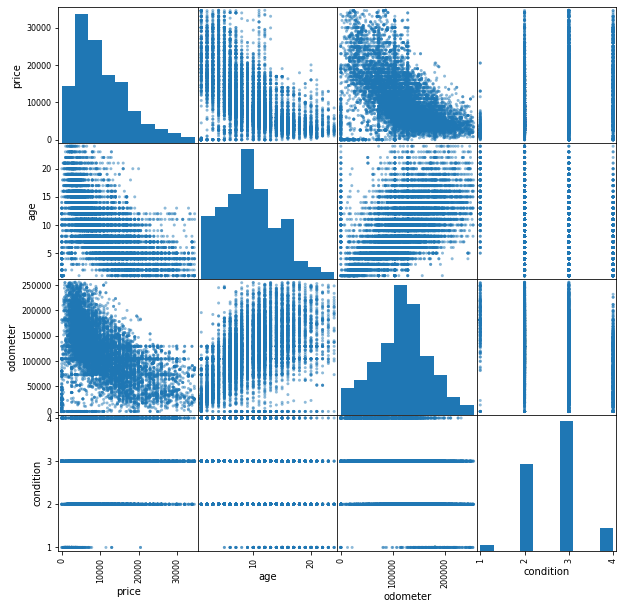

In [50]:
# Analyzing the correlation between the price of SUVs and other quantitative variables
data_for_corr_suv = data_filtered_type_suv.loc[:,['price','age','odometer','condition']]
print(data_for_corr_suv.corr(), '\n')
scatter_matrix = pd.plotting.scatter_matrix(data_for_corr_suv, figsize=(10,10))

The values in the "transmission" column are:

automatic    11203
manual         455
other           95
Name: transmission, dtype: int64 

Looking only at transmissions with more than 50 ads, which are:
 ['automatic' 'manual' 'other'] 

The median prices for the different transmissions are:

              price
transmission       
automatic      8700
manual        10995
other         12900 



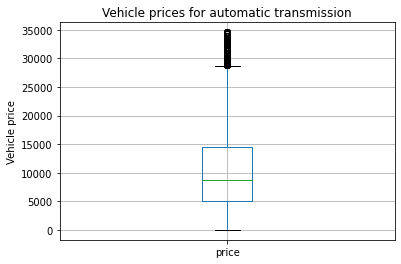

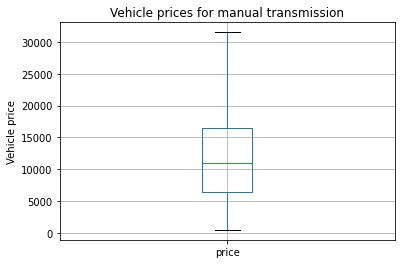

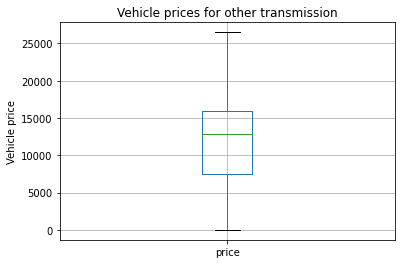

In [51]:
# Analyzing the effect of transmission type on the price of SUVs
# Keeping the variables of interest
data_suv_price_transmission = data_filtered_type_suv.loc[:,['price','transmission']]

print('The values in the "transmission" column are:\n')
print(data_suv_price_transmission['transmission'].value_counts(), '\n')

# Keeping the transmissions with more than a certain number of ads
ads_threshold = 50
series_suv_price_transmission = data_suv_price_transmission['transmission'].value_counts()
series_suv_price_transmission_good = series_suv_price_transmission.to_frame().query('transmission > @ads_threshold')['transmission']
transmission_good = series_suv_price_transmission_good.index.values # Returns a np.ndarray of strings
data_suv_price_transmission_good = data_suv_price_transmission.query('transmission in @transmission_good')
print('Looking only at transmissions with more than {} ads, which are:\n'.format(ads_threshold), transmission_good, '\n')

# Calculating statistics
print('The median prices for the different transmissions are:\n')
print(data_suv_price_transmission_good.pivot_table(index='transmission', values='price', aggfunc='median').sort_values('price'), '\n')

# Plotting boxplots
for transmission_value in transmission_good:
    axes = data_suv_price_transmission_good.query('transmission == @transmission_value').boxplot('price')
    axes.set_title('Vehicle prices for ' + transmission_value + ' transmission')
    axes.set_ylabel('Vehicle price')
    plt.show()

The values in the "paint_color" column are:

unknown    2110
black      2062
white      1853
silver     1525
grey       1137
blue        997
red         864
green       405
brown       350
custom      286
orange       81
yellow       45
purple       38
Name: paint_color, dtype: int64 

Looking only at paint colors with more than 50 ads, which are:
 ['unknown' 'black' 'white' 'silver' 'grey' 'blue' 'red' 'green' 'brown'
 'custom' 'orange'] 

The median prices for the different paint colors are:

               price
paint_color         
green         6495.0
blue          6995.0
brown         7444.0
red           7825.0
custom        8250.0
silver        8395.0
grey          8500.0
unknown       8897.5
white         9900.0
black        10995.0
orange       16900.0 



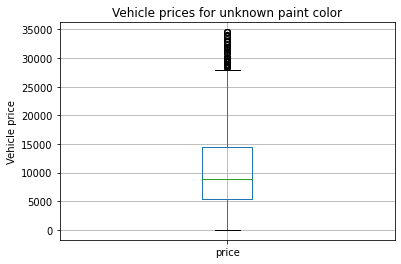

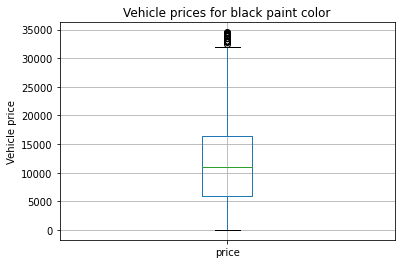

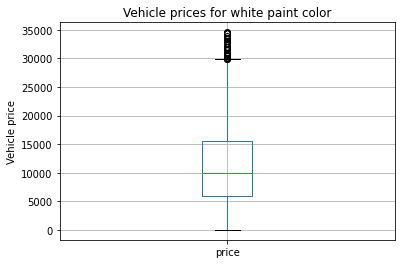

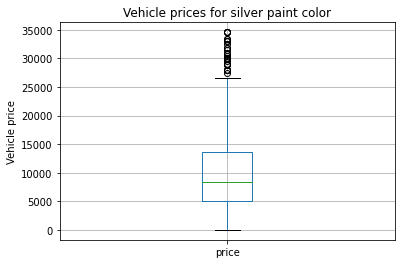

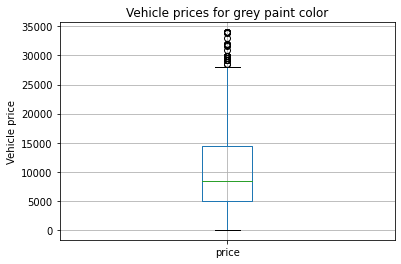

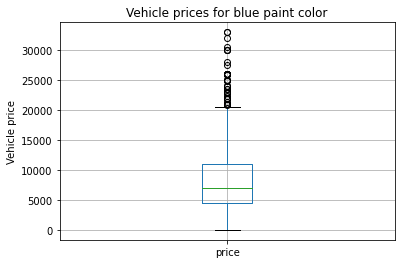

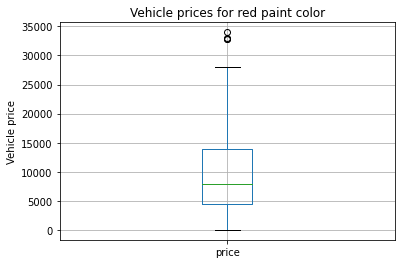

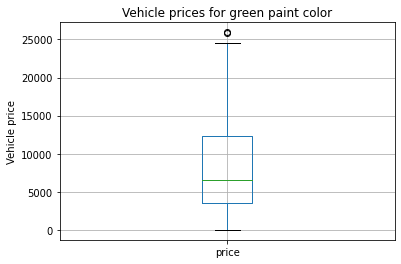

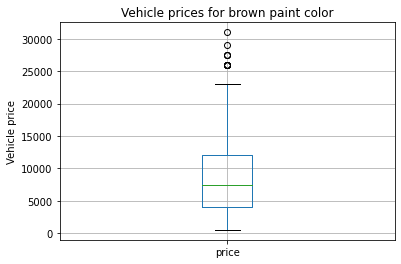

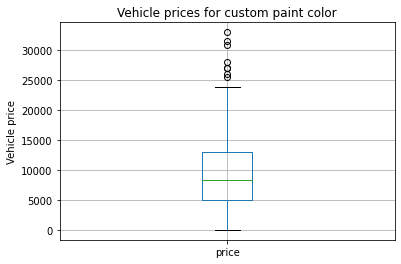

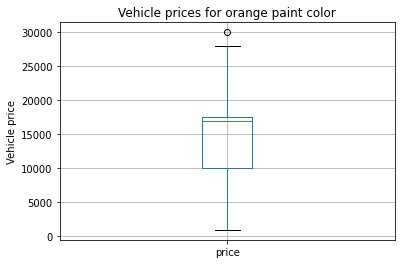

In [52]:
# Analyzing the effect of paint color on the price of SUVs
# Keeping the variables of interest
data_suv_price_paint_color = data_filtered_type_suv.loc[:,['price','paint_color']]

print('The values in the "paint_color" column are:\n')
print(data_suv_price_paint_color['paint_color'].value_counts(), '\n')

# Keeping the paint colors with more than a certain number of ads
ads_threshold = 50
series_suv_price_paint_color = data_suv_price_paint_color['paint_color'].value_counts()
series_suv_price_paint_color_good = series_suv_price_paint_color.to_frame().query('paint_color > @ads_threshold')['paint_color']
paint_color_good = series_suv_price_paint_color_good.index.values # Returns a np.ndarray of strings
data_suv_price_paint_color_good = data_suv_price_paint_color.query('paint_color in @paint_color_good')
print('Looking only at paint colors with more than {} ads, which are:\n'.format(ads_threshold), paint_color_good, '\n')

# Calculating statistics
print('The median prices for the different paint colors are:\n')
print(data_suv_price_paint_color_good.pivot_table(index='paint_color', values='price', aggfunc='median').sort_values('price'), '\n')

# Plotting boxplots
for paint_color_value in paint_color_good:
    axes = data_suv_price_paint_color_good.query('paint_color == @paint_color_value').boxplot('price')
    axes.set_title('Vehicle prices for ' + paint_color_value + ' paint color')
    axes.set_ylabel('Vehicle price')
    plt.show()

The values in the "transmission" column are:

automatic    11039
manual         551
other           74
Name: transmission, dtype: int64 

Looking only at transmissions with more than 50 ads, which are:
 ['automatic' 'manual' 'other'] 

The median prices for the different transmissions are:

              price
transmission       
manual         4600
other          5969
automatic      6000 



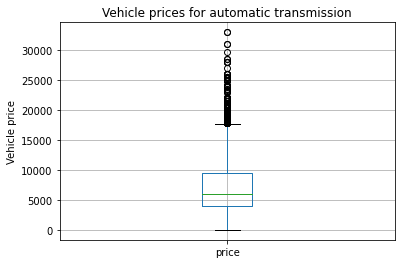

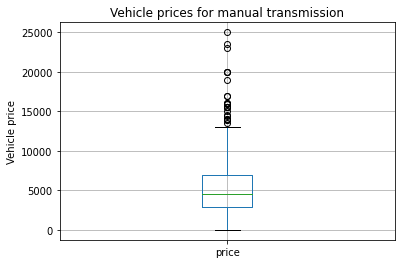

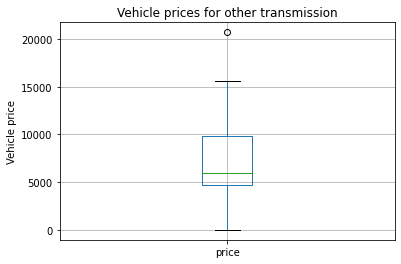

In [53]:
# Analyzing the effect of transmission type on the price of sedans
# Keeping the variables of interest
data_sedan_price_transmission = data_filtered_type_sedan.loc[:,['price','transmission']]

print('The values in the "transmission" column are:\n')
print(data_sedan_price_transmission['transmission'].value_counts(), '\n')

# Keeping the transmissions with more than a certain number of ads
ads_threshold = 50
series_sedan_price_transmission = data_sedan_price_transmission['transmission'].value_counts()
series_sedan_price_transmission_good = series_sedan_price_transmission.to_frame().query('transmission > @ads_threshold')['transmission']
transmission_good = series_sedan_price_transmission_good.index.values # Returns a np.ndarray of strings
data_sedan_price_transmission_good = data_sedan_price_transmission.query('transmission in @transmission_good')
print('Looking only at transmissions with more than {} ads, which are:\n'.format(ads_threshold), transmission_good, '\n')

# Calculating statistics
print('The median prices for the different transmissions are:\n')
print(data_sedan_price_transmission_good.pivot_table(index='transmission', values='price', aggfunc='median').sort_values('price'), '\n')

# Plotting boxplots
for transmission_value in transmission_good:
    axes = data_sedan_price_transmission_good.query('transmission == @transmission_value').boxplot('price')
    axes.set_title('Vehicle prices for ' + transmission_value + ' transmission')
    axes.set_ylabel('Vehicle price')
    plt.show()

#### Sedans

              price       age  odometer  condition
price      1.000000 -0.632029 -0.535030   0.293314
age       -0.632029  1.000000  0.539781  -0.296303
odometer  -0.535030  0.539781  1.000000  -0.358925
condition  0.293314 -0.296303 -0.358925   1.000000 



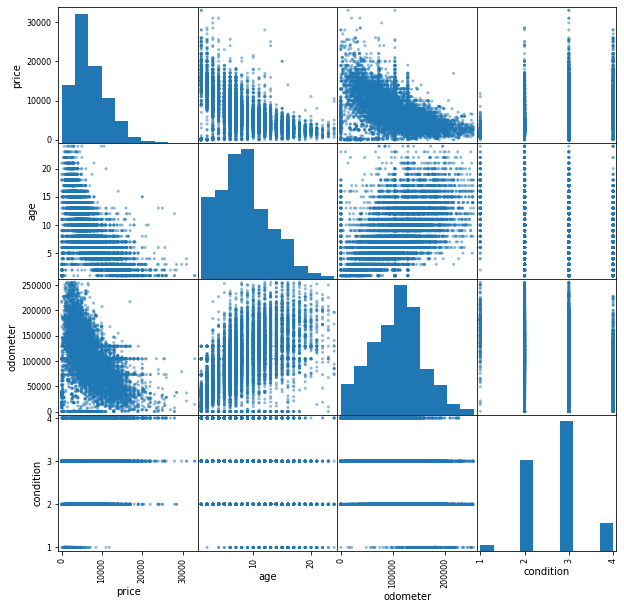

In [54]:
# Analyzing the correlation between the price of sedans and other quantitative variables
data_for_corr_sedan = data_filtered_type_sedan.loc[:,['price','age','odometer','condition']]
print(data_for_corr_sedan.corr(), '\n')
scatter_matrix = pd.plotting.scatter_matrix(data_for_corr_sedan, figsize=(10,10))

The values in the "transmission" column are:

automatic    11039
manual         551
other           74
Name: transmission, dtype: int64 

Looking only at transmissions with more than 50 ads, which are:
 ['automatic' 'manual' 'other'] 

The median prices for the different transmissions are:

              price
transmission       
manual         4600
other          5969
automatic      6000 



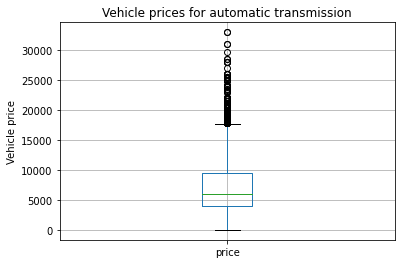

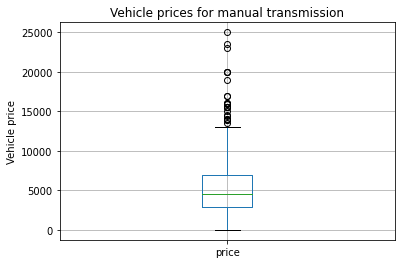

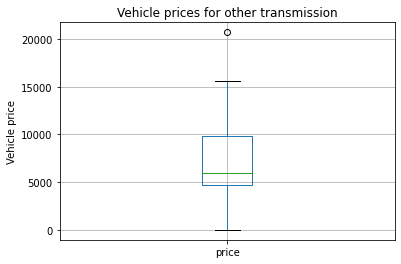

In [55]:
# Analyzing the effect of transmission type on the price of sedans
# Keeping the variables of interest
data_sedan_price_transmission = data_filtered_type_sedan.loc[:,['price','transmission']]

print('The values in the "transmission" column are:\n')
print(data_sedan_price_transmission['transmission'].value_counts(), '\n')

# Keeping the transmissions with more than a certain number of ads
ads_threshold = 50
series_sedan_price_transmission = data_sedan_price_transmission['transmission'].value_counts()
series_sedan_price_transmission_good = series_sedan_price_transmission.to_frame().query('transmission > @ads_threshold')['transmission']
transmission_good = series_sedan_price_transmission_good.index.values # Returns a np.ndarray of strings
data_sedan_price_transmission_good = data_sedan_price_transmission.query('transmission in @transmission_good')
print('Looking only at transmissions with more than {} ads, which are:\n'.format(ads_threshold), transmission_good, '\n')

# Calculating statistics
print('The median prices for the different transmissions are:\n')
print(data_sedan_price_transmission_good.pivot_table(index='transmission', values='price', aggfunc='median').sort_values('price'), '\n')

# Plotting boxplots
for transmission_value in transmission_good:
    axes = data_sedan_price_transmission_good.query('transmission == @transmission_value').boxplot('price')
    axes.set_title('Vehicle prices for ' + transmission_value + ' transmission')
    axes.set_ylabel('Vehicle price')
    plt.show()

The values in the "paint_color" column are:

unknown    2106
silver     1990
black      1709
grey       1560
white      1434
blue       1194
red         902
custom      267
brown       248
green       201
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64 

Looking only at paint colors with more than 50 ads, which are:
 ['unknown' 'silver' 'black' 'grey' 'white' 'blue' 'red' 'custom' 'brown'
 'green'] 

The median prices for the different paint colors are:

             price
paint_color       
green         3900
brown         4498
blue          5750
custom        5995
red           5995
silver        5995
unknown       5999
grey          6295
white         6800
black         6988 



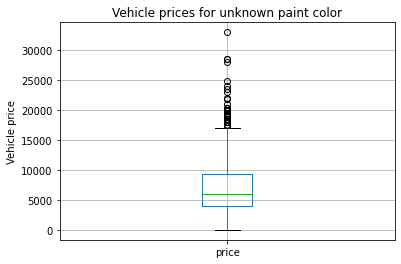

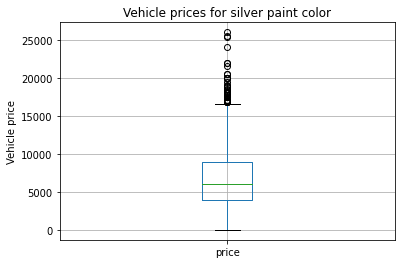

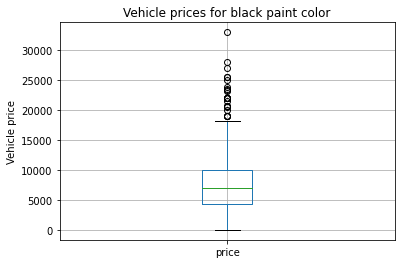

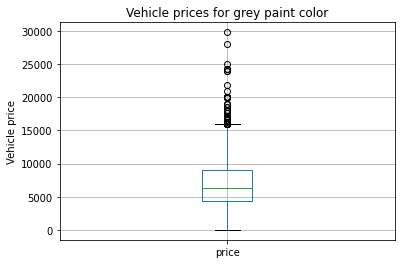

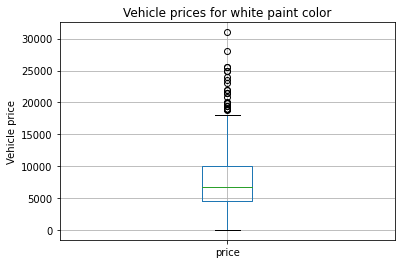

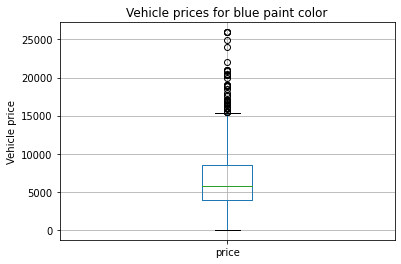

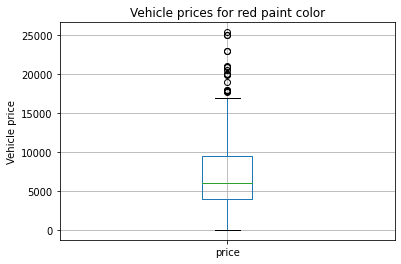

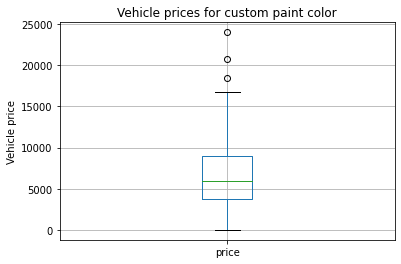

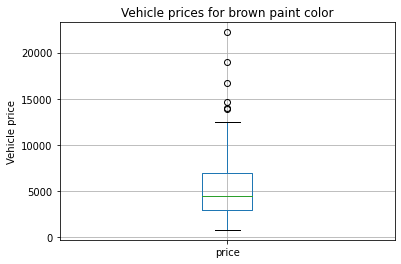

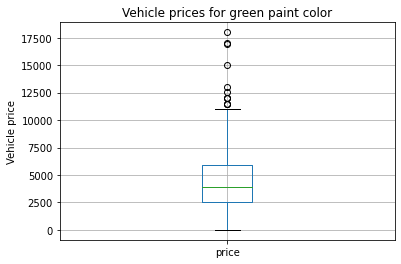

In [56]:
# Analyzing the effect of paint color on the price of sedans
# Keeping the variables of interest
data_sedan_price_paint_color = data_filtered_type_sedan.loc[:,['price','paint_color']]

print('The values in the "paint_color" column are:\n')
print(data_sedan_price_paint_color['paint_color'].value_counts(), '\n')

# Keeping the paint colors with more than a certain number of ads
ads_threshold = 50
series_sedan_price_paint_color = data_sedan_price_paint_color['paint_color'].value_counts()
series_sedan_price_paint_color_good = series_sedan_price_paint_color.to_frame().query('paint_color > @ads_threshold')['paint_color']
paint_color_good = series_sedan_price_paint_color_good.index.values # Returns a np.ndarray of strings
data_sedan_price_paint_color_good = data_sedan_price_paint_color.query('paint_color in @paint_color_good')
print('Looking only at paint colors with more than {} ads, which are:\n'.format(ads_threshold), paint_color_good, '\n')

# Calculating statistics
print('The median prices for the different paint colors are:\n')
print(data_sedan_price_paint_color_good.pivot_table(index='paint_color', values='price', aggfunc='median').sort_values('price'), '\n')

# Plotting boxplots
for paint_color_value in paint_color_good:
    axes = data_sedan_price_paint_color_good.query('paint_color == @paint_color_value').boxplot('price')
    axes.set_title('Vehicle prices for ' + paint_color_value + ' paint color')
    axes.set_ylabel('Vehicle price')
    plt.show()

### Conclusion

For SUVs, price depends on the various variables as follows:
- Age - There was a medium negative correlation (Pearson correlation coefficient = ~-0.6). It makes sense that as the age raises, the price diminishes.
- Mileage - There was a medium negative correlation (Pearson correlation coefficient = ~-0.5). It makes sense that as the mileage raises, the price decreases.
- Condition - There was a medium negative correlation (Pearson correlation coefficient = ~0.25). It makes sense that the better the condition is, the higher the price is, but that people would like to look at stronger indicators of quality more, such as age and mileage, since summing all of the parameters into a single number isn't simple. 
- Transmission type - The price was the highest for the transmission type "other", followed by "manual" and finally "automatic". This can be explained by people preferring to not use automatic transmission in SUVs, or by another parameter, such as newer vehicles tending to have these more favoured transmission types.
- Paint color - The price was higher for the more common colors - like black, white and grey - and lower for more unusual colors - like brown, blue and green. This makes sense since it's harder to sell cars with unusual colors. I note that the color orange, which is a relatively unusual color, was priced the highest, which can perhaps arise from an expensive line of SUVs which were made in orange.

For sedans, price depends on the various variables as follows:
- Age - There was a medium negative correlation (Pearson correlation coefficient = ~-0.6). It makes sense that as the age raises, the price decreases.
- Mileage - There was a medium negative correlation (Pearson correlation coefficient = ~-0.5). It makes sense that as the mileage raises, the price diminishes.
- Condition - There was a medium negative correlation (Pearson correlation coefficient = ~0.3). It makes sense that the better the condition is, the higher the price is, but that people would like to look at stronger indicators of quality more, such as age and mileage, since summing all of the parameters into a single number isn't simple. 
- Transmission type - The price was the highest for the transmission type "automatic", followed by "other" and finally "manual". This can be explained by people preferring to not use manual transmission in SUVs, or by another parameter, such as newer vehicles tending to have these more favoured transmission types.
- Paint color - The price was higher for the more common colors - like black, white and grey - and lower for more unusual colors - like blue, brown and green. This makes sense since it's harder to sell cars with unusual colors.

## Overall conclusion

We saw that the quality of the dataset was far from perfect, as it contained many issues which we had to solve by preprocessing it. The types of issues that appeared were:

- Values were missing. In this case I filled in some of the numerical missing values with the median value of the corresponding columns, filled in some values based on context and removed others.
- Values didn't have the correct data type. In this case I converted the data types into the correct types.

Following the preprocessing, we analyzed the data and concluded the following:

- The data contained many outliers with a wide range, whose existence made sense. These made it harder to read the histograms of the variables, and their removal remedied this issue without changing the general shape of the distributions.
- Ads are listed for a typical duration of about a month. There are no clear quantitative variables that are correlated to this duration for ads that were taken off after a very short or a very long time.
- SUVs and sedans are the two most popular types of vehicles. Trucks and pickups had the highest mean prices, which is expected due to their large size.

- The price of SUVs and sedans has a medium negative correlation (~-0.5 Pearson correlation coefficient) with the vehicle's age and mileage, which is expected. There's a weaker correlation with the condition of the vehicle. Transmission type and paint color can also impact the price, where the color can even almost double it.